In [66]:
import numpy as np
import pandas as pd

In [67]:
credits = pd.read_csv('datasets/credits.csv')

In [68]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [69]:
credits.dtypes

cast    object
crew    object
id       int64
dtype: object

In [70]:
meta = pd.read_csv('datasets/movies_metadata.csv')

D:\Misc_softwares\Anaconda\envs\movie\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [71]:
meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [72]:
meta.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [73]:
meta['release_date'] = pd.to_datetime(meta['release_date'], errors='coerce')
meta['year'] = meta['release_date'].dt.year

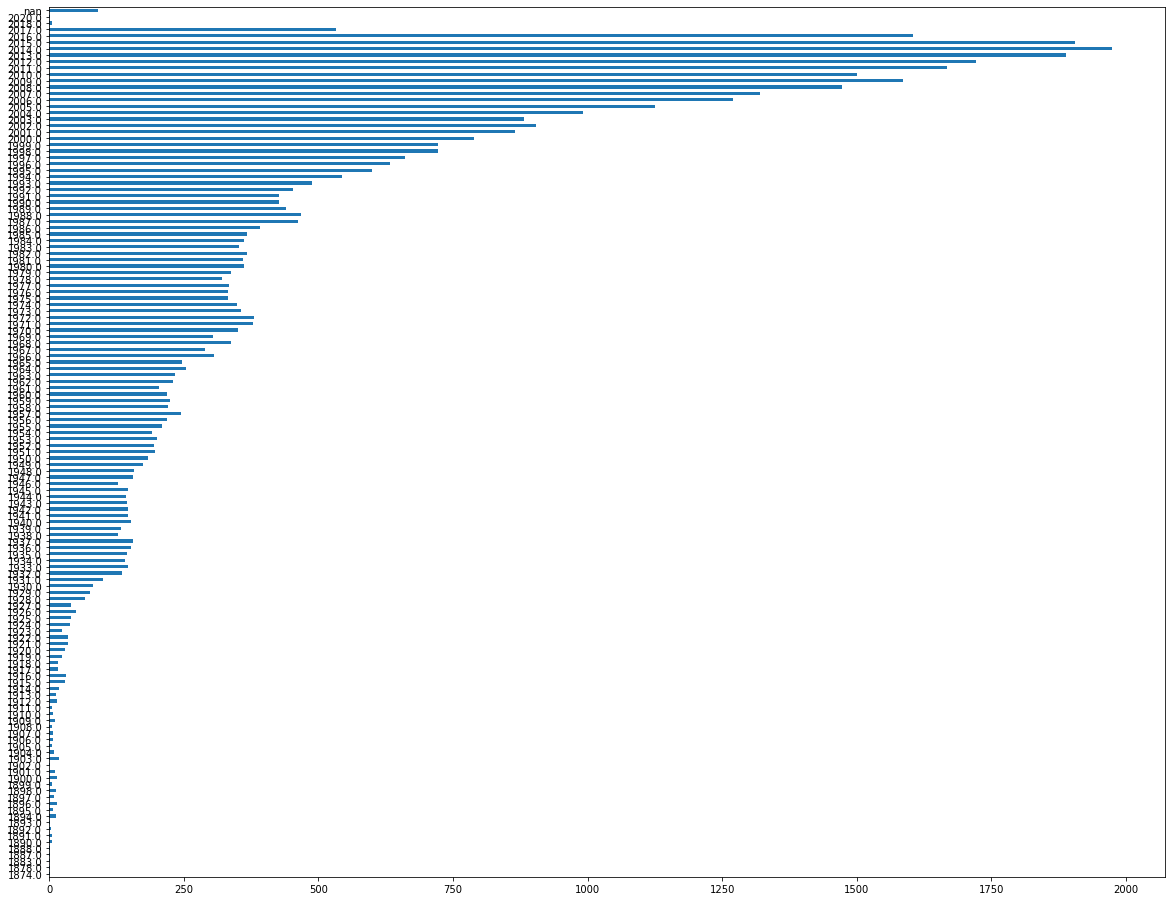

In [74]:
import matplotlib.pyplot as plt
meta.year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(20,16))
plt.show()

### As seen in the above plot we only have data for movies released in or before 2017. However, we already have data for movies upto 2016 and the data for movies in 20018, 2019, 2020 is not enough. So for now we'll just take the data for 2017.

In [75]:
new_meta = meta.loc[meta.year == 2017,['genres','id','title','year']]

In [76]:
new_meta.head()

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0


**Changing the dtype of column "id" to int becasue the dtype of the column in credits is int, and we are going to use "id" to merge the two dataframes.**

In [77]:
new_meta['id'] = new_meta['id'].astype(int)

In [78]:
data = pd.merge(new_meta, credits, on='id')

In [79]:
data.head()

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'de..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'de..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', '...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'de..."
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / St...","[{'credit_id': '59171547925141583c0315a6', 'de..."
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV',...","[{'credit_id': '5431de49c3a36825d300007e', 'de..."


**Using the ```ast``` module to safely evaluate what appear to be json or dictionary type objects in columns ```genres,cast and crew```.**

In [80]:
import ast
data['genres'] = data['genres'].map(lambda x: ast.literal_eval(x))
data['cast'] = data['cast'].map(lambda x: ast.literal_eval(x))
data['crew'] = data['crew'].map(lambda x: ast.literal_eval(x))

In [81]:
data['genres'][2]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

### Reformating the data in columns ```genres,cast and crew``` to match the format of 2016 movie data

In [82]:
def generate_GenresList(x):
    ''' Takes genres objects and returns string which is a space seperated
    list of genres'''
    genres = []
    st = " "
    for i in x:
        if i.get('name') == 'Science Fiction':
            scifi = 'Sci-Fi'
            genres.append(scifi)
        else:
            genres.append(i.get('name'))
    if genres == []:
        return np.NaN
    else:
        return (st.join(genres))

In [83]:
data['genres_list'] = data['genres'].map(lambda x: generate_GenresList(x))

In [84]:
data['genres_list']

0      Adventure Action Fantasy Comedy
1      Action Adventure Fantasy Sci-Fi
2      Action Adventure Fantasy Sci-Fi
3       Action Adventure Comedy Sci-Fi
4             Fantasy Action Adventure
                    ...               
526                     Romance Comedy
527         Crime Comedy Action Family
528    Family Animation Romance Comedy
529               Crime Drama Thriller
530                                NaN
Name: genres_list, Length: 531, dtype: object

In [105]:
print(data['cast'][0][0].get('name'))

Johnny Depp


In [118]:
data['cast'][0]

[{'cast_id': 1,
  'character': 'Captain Jack Sparrow',
  'credit_id': '52fe4c9cc3a36847f8236a53',
  'gender': 2,
  'id': 85,
  'name': 'Johnny Depp',
  'order': 0,
  'profile_path': '/kbWValANhZI8rbWZXximXuMN4UN.jpg'},
 {'cast_id': 9,
  'character': 'Captain Armando Salazar',
  'credit_id': '54db4949c3a368122d0017fe',
  'gender': 2,
  'id': 3810,
  'name': 'Javier Bardem',
  'order': 1,
  'profile_path': '/grBOK7Ep09JBE3H5LyV5JaZZ1XZ.jpg'},
 {'cast_id': 16,
  'character': 'Captain Hector Barbossa',
  'credit_id': '54e44e5ec3a368454b00a02f',
  'gender': 2,
  'id': 118,
  'name': 'Geoffrey Rush',
  'order': 2,
  'profile_path': '/5h91WHSK80YtqTk1bMiar2IZzO2.jpg'},
 {'cast_id': 7,
  'character': 'Henry Turner',
  'credit_id': '54db49359251415a0d0012a0',
  'gender': 2,
  'id': 1017347,
  'name': 'Brenton Thwaites',
  'order': 3,
  'profile_path': '/dM0m0OxREfW4HxwV2qQeitS8dfO.jpg'},
 {'cast_id': 8,
  'character': 'Carina Smyth',
  'credit_id': '54db493e925141618f00189a',
  'gender': 1,
  '

#### Converting the cast column into three column corresponding to first three actors to matach the old data format.

In [119]:
def get_actor(x, number=1):
    '''Takes pd series object "cast" and returns the name of actor in "nubmer" position'''
    cast = []
    for i in x:
        cast.append(i.get('name'))
    if cast == []:
        return np.NaN
    if number == 2 and len(cast)<=1:
        return np.NaN
    if number == 3 and len(cast)<=2:
        return np.NaN
    else:
        return (cast[number-1])

In [115]:
data['actor_1_name'] = data['cast'].map(lambda x: get_actor(x))

In [116]:
data['actor_2_name'] = data['cast'].map(lambda x: get_actor(x,2))

In [117]:
data['actor_3_name'] = data['cast'].map(lambda x: get_actor(x,3))

#### We only need the name of director from the list of crew members

In [121]:
data['crew'][0]

[{'credit_id': '52fe4c9cc3a36847f8236a65',
  'department': 'Production',
  'gender': 2,
  'id': 770,
  'job': 'Producer',
  'name': 'Jerry Bruckheimer',
  'profile_path': '/lQu9eRzRX264j2LFQwvKC50wb9s.jpg'},
 {'credit_id': '592f443cc3a3685cf7000019',
  'department': 'Writing',
  'gender': 2,
  'id': 1705,
  'job': 'Characters',
  'name': 'Ted Elliott',
  'profile_path': '/9OXGC59dpVDdfwSeEdHgxpoHXVu.jpg'},
 {'credit_id': '591298d6c3a36864fc04d1a4',
  'department': 'Production',
  'gender': 2,
  'id': 1706,
  'job': 'Executive Producer',
  'name': 'Terry Rossio',
  'profile_path': '/zvlhzykondhUf26gknMo8hLMuCn.jpg'},
 {'credit_id': '52fe4c9cc3a36847f8236a5f',
  'department': 'Writing',
  'gender': 2,
  'id': 1706,
  'job': 'Characters',
  'name': 'Terry Rossio',
  'profile_path': '/zvlhzykondhUf26gknMo8hLMuCn.jpg'},
 {'credit_id': '591298289251414e8904f223',
  'department': 'Writing',
  'gender': 2,
  'id': 1706,
  'job': 'Story',
  'name': 'Terry Rossio',
  'profile_path': '/zvlhzykond

In [122]:
def get_directors(x):
    director = []
    for i in x:
        if i.get('job') == 'Director':
            director.append(i.get('name'))
    if director == []:
        return np.NaN
    else:
        return (" ".join(director))

In [123]:
data['director_name'] = data['crew'].map(lambda x: get_directors(x))

In [124]:
data['director_name']

0      Joachim Rønning Espen Sandberg
1                         Zack Snyder
2                       Taika Waititi
3                          James Gunn
4                       Sean McNamara
                    ...              
526                  Hannaleena Hauru
527             Jonathan A. Rosenbaum
528          Beth David Esteban Bravo
529                      Ravi Udyawar
530                     Daisy Asquith
Name: director_name, Length: 531, dtype: object

###  Creating a new dataframe consisting only of the needed features.

In [125]:
movies_17 = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres_list','title']]

In [126]:
movies_17.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres_list,title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,Pirates of the Caribbean: Dead Men Tell No Tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,Justice League
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,Thor: Ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,Guardians of the Galaxy Vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,The King's Daughter


#### Checking for null values and dropping rows with null values

In [128]:
movies_17.isna().sum()

director_name     4
actor_1_name     22
actor_2_name     55
actor_3_name     70
genres_list       7
title             0
dtype: int64

In [130]:
movies_17.dropna(how='any', inplace=True)

In [131]:
movies_17.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres_list      0
title            0
dtype: int64

**Renaming column names to match the old dataframe column names**

In [132]:
movies_17 = movies_17.rename(columns={'genres_list':'genres'})
movies_17 = movies_17.rename(columns={'title':'movie_title'})

In [134]:
# Conveting the movie title to lower case
movies_17['movie_title'] = movies_17['movie_title'].str.lower()

#### Combining all columns to form a new column to help in the NLP sentiment analysis part 

In [137]:
movies_17['comb'] = movies_17['actor_1_name'] + ' ' + movies_17['actor_2_name'] + ' '+ movies_17['actor_3_name'] + ' '+ movies_17['director_name'] +' ' + movies_17['genres']

**Loading the data of movies released in or before 2016**

In [135]:
old = pd.read_csv('data.csv')

In [136]:
old.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,The Dark Knight Rises
4,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action Adventure Sci-Fi,John Carter


In [138]:
old.shape

(4704, 6)

In [139]:
old['comb'] = old['actor_1_name'] + ' ' + old['actor_2_name'] + ' '+ old['actor_3_name'] + ' '+ old['director_name'] +' ' + old['genres']

In [143]:
new_data = old.append(movies_17)

In [144]:
new_data.shape

(5162, 7)

#### Deleting duplicate entries for the same movie,just in case

In [142]:
new_data.drop_duplicates(subset ="movie_title", keep = 'last', inplace = True)

In [145]:
new_data.shape

(5162, 7)

**There were no duplicates, we'll just save the new consolidated dataset.**

In [147]:
new_data.to_csv('new_data.csv',index=False)